## Lazar Novakovic HW#3 Physics 404
## (18 February 2020 before 11:30 am)


### We will need to compare schemes of differentiation in Python and analyze optimal value(s) for dx and error.
### We will specifically be using the function $f(x) = cos(x)$, and evaluating the derivative at $ x = \frac{\pi}{4} $ and later at $x = 0$

### The values of dx will vary from $10^{-16}$, machine precision, to $dx=0.1$. 
##### (Of the form $dx^{-n}$  with $n \in {[1,2,...,16]} $ )
### Will determine the optimal value(s) of n.

### We will be using the forward differene scheme and central difference scheme.  



In [2]:
import numpy as np
import matplotlib.pyplot as plt



def forwardD(f,x,dx):

    return (f(x+dx) - f(x))/dx

## The limit as this dx goes to 0 SHOULD analytically be the limit of the true derivative.
## However, computationally other factors, such as error division, can become more promoinent as the limit of dx to 0. 
## We know the theoretical value of the derivative should be...
## Note: Of course, I have followed this same process through out for x_02 = 0, however for the second case
## I looked at absolute error rather than relative error as to avoid division by 0...

$$ \frac{d}{dx} cosx = -sinx$$
$$-sin(\frac{\pi}{4}) = -\frac{\sqrt{2}}{2} $$

In [114]:
x_0 = np.pi/4.0
x_02 = 0
H = []
F = []
F2 = []
f = np.cos
f_T = []
y= []
G= []
G2 = []
for i in range(16):
    h = 10**(-(i+1))
    H.append(h)
    f_1 = forwardD(f,x_0,h)
    f_10 = forwardD(f,x_02,h)
    F.append(f_1)
    F2.append(f_10)
    f_T.append(-(2.0)**-(0.5))
    y.append(0)
    G.append(abs((2.0)**-(0.5) + f_1)/((2.0)**-(0.5)))
    G2.append(abs(0+f_10))
    print("For dx =", h, "f'(x_0) =",  f_1)

For dx = 0.1 f'(x_0) = -0.7412547450958928
For dx = 0.01 f'(x_0) = -0.7106305005757041
For dx = 0.001 f'(x_0) = -0.7074602166965427
For dx = 0.0001 f'(x_0) = -0.707142135347727
For dx = 1e-05 f'(x_0) = -0.7071103167111125
For dx = 1e-06 f'(x_0) = -0.7071071347342084
For dx = 1e-07 f'(x_0) = -0.7071068164332672
For dx = 1e-08 f'(x_0) = -0.7071067953390298
For dx = 1e-09 f'(x_0) = -0.7071068175434903
For dx = 1e-10 f'(x_0) = -0.7071065954988853
For dx = 1e-11 f'(x_0) = -0.7071121466140085
For dx = 1e-12 f'(x_0) = -0.7071010443837622
For dx = 1e-13 f'(x_0) = -0.7072120666862247
For dx = 1e-14 f'(x_0) = -0.7105427357601002
For dx = 1e-15 f'(x_0) = -0.7771561172376095
For dx = 1e-16 f'(x_0) = -1.1102230246251565


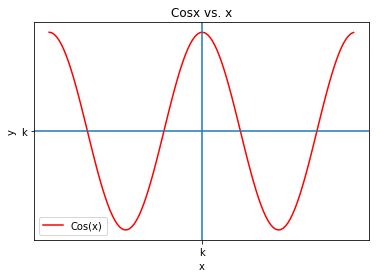

In [115]:
cos = lambda x: np.cos(x)
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

plt.plot(x, cos(x), 'r-', label='Cos(x)')
plt.axhline('k')
plt.axvline('k')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Cosx vs. x')
plt.legend()
plt.show()

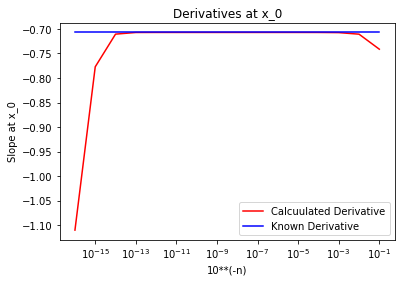

In [116]:
plt.plot(H, F, 'r-', label='Calcuulated Derivative')
plt.plot(H, f_T, 'b-', label='Known Derivative')
plt.xlabel("10**(-n)")
plt.ylabel("Slope at x_0")
plt.xscale('log')
plt.title('Derivatives at x_0')
plt.legend()
plt.show()

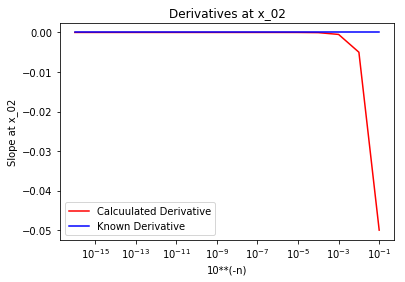

In [117]:
plt.plot(H, F2, 'r-', label='Calcuulated Derivative')
plt.plot(H, y, 'b-', label='Known Derivative')
plt.xlabel("10**(-n)")
plt.ylabel("Slope at x_02")
plt.xscale('log')
plt.title('Derivatives at x_02')
plt.legend()
plt.show()

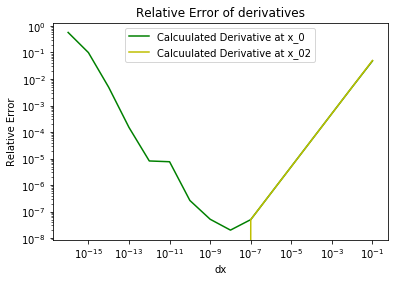

In [118]:
# As for the absolute error...

#G = abs(-f_T + F)/(f_T)

plt.plot(H,G, 'g-',label='Calcuulated Derivative at x_0')
plt.plot(H,G2, 'y-', label='Calcuulated Derivative at x_02')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Relative Error')
plt.title('Relative Error of derivatives')
plt.legend()
plt.show()

### Note: This is graph is good news because the minimum appears to be roughly at $10^{-8}$
### As we saw in class the optimal h, or dx, should be the value at which the derivative of the total error, dependent on the machine precision and truncation error, is 0. Finding the minimumn yields.


$$\epsilon -e/dx=0 $$
$$dx = e/ (\epsilon) $$

### For optimal dx we have, with machine precision being $10^{-16}$ and $\epsilon = 10^{-8}$

$$ dx = 10^{-8}$$

#### Will yield a minimum...


### As for central difference 

In [119]:
def centralD(f,x,dx):
    
    return (f(x+dx/2)-f(x-dx/2))/dx

# As before, we loop through....
H2 = []
f_2 = []
f_T2 = []
f_T20 = []
Z = []
Z2 = []
for i in range(16):
    h = 10**(-(i+1))
    H2.append(h)
    f_2 = centralD(f,x_0,h)
    f_20 = centralD(f,x_02,h)
    f_T2.append(-(2.0)**-(0.5))
    Z.append(abs((2.0)**-(0.5) + f_2)/((2.0)**-(0.5)))
    Z2.append(abs(0+f_20))
    print("For dx =", h, "f'(x_0) =",  f_2)

For dx = 0.1 f'(x_0) = -0.7068121901873392
For dx = 0.01 f'(x_0) = -0.7071038349119818
For dx = 0.001 f'(x_0) = -0.7071067517236962
For dx = 0.0001 f'(x_0) = -0.7071067808916975
For dx = 1e-05 f'(x_0) = -0.7071067811836861
For dx = 1e-06 f'(x_0) = -0.707106781128175
For dx = 1e-07 f'(x_0) = -0.7071067820163535
For dx = 1e-08 f'(x_0) = -0.7071067842367995
For dx = 1e-09 f'(x_0) = -0.7071068175434903
For dx = 1e-10 f'(x_0) = -0.7071065954988853
For dx = 1e-11 f'(x_0) = -0.7071010443837622
For dx = 1e-12 f'(x_0) = -0.7072120666862247
For dx = 1e-13 f'(x_0) = -0.7072120666862247
For dx = 1e-14 f'(x_0) = -0.7105427357601002
For dx = 1e-15 f'(x_0) = -0.7771561172376095
For dx = 1e-16 f'(x_0) = 0.0


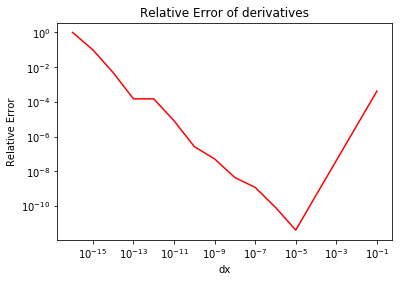

In [120]:
plt.plot(H2,Z, 'r-')
plt.plot(H2,Z2, 'b-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Relative Error')
plt.title('Relative Error of derivatives')
plt.show()

### Now, notice that we reach a sharp minimum about $10^{-5}$, whereas the forward differnece scheme we reach that minimum at $10^{-8}$. This is a difference of 3 orders of magnitude. This value is even larger than than machine precision in order to reach an optimal derivative. 

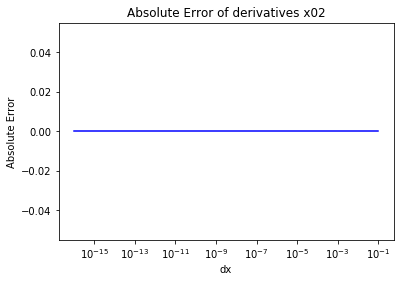

In [127]:
plt.plot(H2,Z2, 'b-')
plt.xlabel('dx')
plt.xscale('log')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of derivatives x02')
plt.show()

### This difference between the two schemes may be due to the difference in Taylor series approximations, notable to see that for the central differnce scheme the Taylor series is convieniently...

###                                                                      (Taylor series)

$$f'(x) + 1/24 h^2 f^{(3)}(x) + (h^4 f^{(5)}(x))/1920 + O(h^{6})$$

### Whereas for the forward scheme it is...

$$f'(x) + 1/2 h f''(x) + 1/6 h^2 f^{(3)}(x) + 1/24 h^3 f^{(4)}(x) + 1/120 h^4 f^{(5)}(x) + 1/720 h^5 f^{(6)}(x) + O(h^{6}) $$


### The key point is that several low order terms are 0. Lower order terms tend to be the largest contribution to accuracy. Several orders terms are *exactly* 0 for the central scheme, and the second and third order contributions come at less of a contribution, i.e. 1/24 and 1/1920, etc... 

### Therefore the contribution due to truncation error is vastly decreased for the central difference scheme. This is fortunately seen in the minimization, as the optimal value of dx is more weighted *away* from the machine precision end, $10^{-5}$, compared to the forward scheme, $10^{-8}$